# **SVM ANALYSIS**
**PAR:** *EL MHAMDI Nouha*

## **Partie 1 : Analyse du Support Vector Machine (SVM) Linéaire**

#### **A. Génération et Visualisation des Données Linéaires**

**Keypoints :**

- Cas idéal : données *linéairement séparables*
  
- 200 points, 2 features
  
- Division : **70% train / 30% test**
  
- Visualisation initiale (Image 1)
  

Dans cette première partie, je travaille sur un scénario parfait : des données qui peuvent être séparées par une simple ligne droite.  
Je génère 200 points avec deux variables, et je règle les paramètres pour que les deux classes ( une bleue et une rouge ) soient distinctes et facilement séparables.  
Ensuite, je divise ces données : 70% serviront à entraîner le modèle, et les 30% restants me permettront d’évaluer sa performance de manière objective.  
Une première visualisation est créée pour montrer la distribution des points d’entraînement.

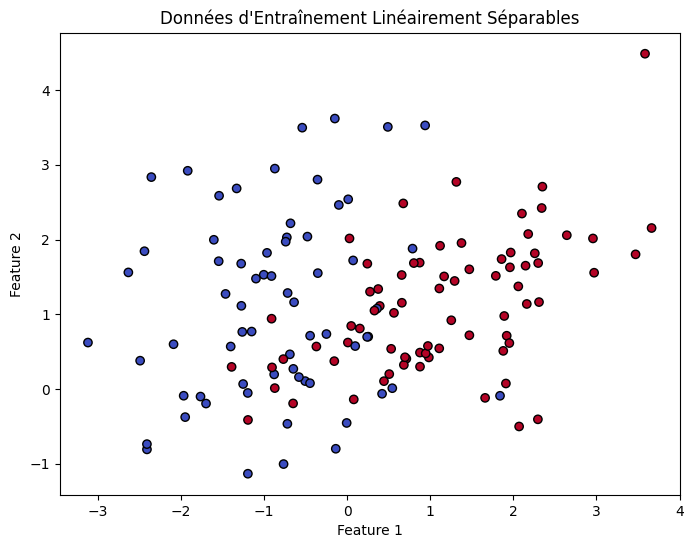

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Génération de données linéaires
X, y = make_classification(n_samples=200, n_features=2,
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Visualisation des données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolors='k')
plt.title("Données d'Entraînement Linéairement Séparables")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### **B. Entraînement et Évaluation du Modèle**

**Keypoints :**

- SVM linéaire : `kernel='linear'`, `C=1.0`
  
- Apprentissage de la frontière
  
- Prédictions sur le test
  
- Accuracy calculée
  
- Support vectors comptés
  


j’initialise ensuite un modèle SVM linéaire avec un kernel linéaire et un paramètre de régularisation C fixé à 1.0.  
Le modèle apprend la frontière de décision uniquement à partir des données d’entraînement.  
Je prédis ensuite les classes du jeu de test, ce qui me permet de calculer l’accuracy : le pourcentage de prédictions correctes.  
Enfin, je compte les vecteurs supports, c’est-à-dire les points les plus importants, ceux qui définissent réellement la frontière de séparation et influencent la marge.

In [3]:
# 2. Implémentation du SVM Linéaire (C=1.0)
C_default = 1.0
svm_linear = SVC(kernel='linear', C=C_default)
svm_linear.fit(X_train, y_train)

# Prédiction et Accuracy
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy SVM Linéaire (C={C_default}): {accuracy:.3f}")

# 3. Nombre de vecteurs supports
n_support_vectors = svm_linear.support_vectors_.shape[0]
print(f"Nombre de vecteurs supports identifiés (C={C_default}): {n_support_vectors}")


Accuracy SVM Linéaire (C=1.0): 0.867
Nombre de vecteurs supports identifiés (C=1.0): 56


#### **C. Fonction de Visualisation de la Frontière**

**Keypoints :**

- Fonction `plot_decision_boundary`
  
- Création d’une grille
  
- Prédiction sur toute la grille
  
- `contourf` pour colorer les régions
  
- Tracé : frontière, marges, vecteurs supports
  
- Image 2
  


Je définis ensuite une fonction essentielle : `plot_decision_boundary`.  
Cette fonction crée d’abord une grille qui couvre tout l’espace du graphique.  
Le modèle prédit ensuite la classe de chaque point de cette grille, ce qui me permet d’afficher les régions colorées selon la prédiction : zone bleue et zone rouge.  
La frontière de décision est tracée en noir, accompagnée de ses marges représentées par des lignes pointillées.  
Les vecteurs supports sont mis en évidence avec des cercles verts pour montrer clairement quels points contrôlent la séparation.

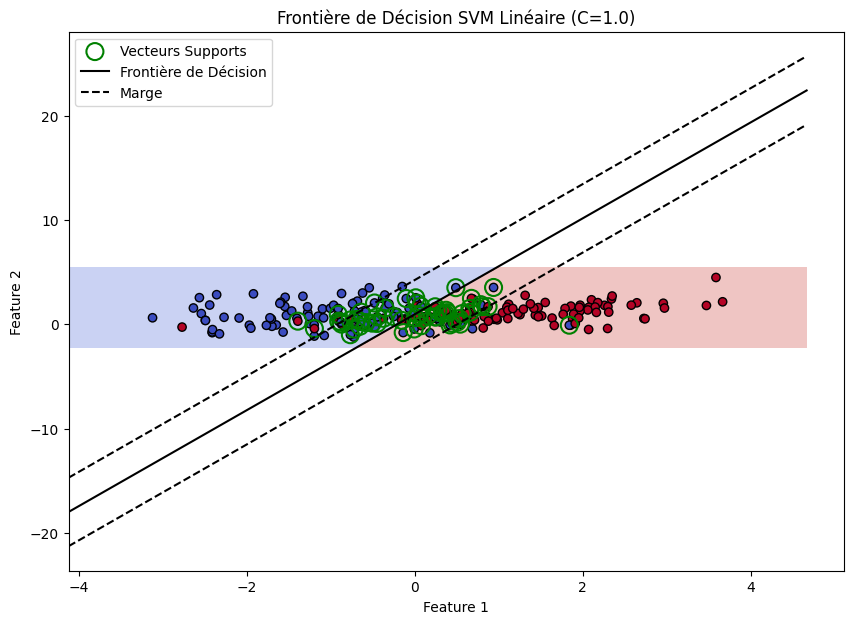

In [4]:
# Fonction pour visualiser la frontière de décision et les marges
def plot_decision_boundary(model, X, y, title):
    # Création d'une grille de points pour évaluer le modèle
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Prédiction sur la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Affichage de la frontière de décision et des marges
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='k')
    
    # Affichage des vecteurs supports
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='green', linewidth=1.5, label='Vecteurs Supports')
    
    # Affichage des marges (seulement pour le noyau linéaire)
    if model.kernel == 'linear':
        w = model.coef_[0]
        a = -w[0] / w[1]
        xx_line = np.linspace(x_min, x_max)
        yy_line = a * xx_line - (model.intercept_[0]) / w[1]
        
        # Calcul de la marge
        margin = 1 / np.sqrt(np.sum(w ** 2))
        yy_down = yy_line - np.sqrt(1 + a ** 2) * margin
        yy_up = yy_line + np.sqrt(1 + a ** 2) * margin
        
        plt.plot(xx_line, yy_line, 'k-', label='Frontière de Décision')
        plt.plot(xx_line, yy_down, 'k--', label='Marge')
        plt.plot(xx_line, yy_up, 'k--')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# 2. Visualisation de la frontière de décision (C=1.0)
plot_decision_boundary(svm_linear, X, y, f"Frontière de Décision SVM Linéaire (C={C_default})")


#### **D. Analyse de l’Impact du Paramètre C**

**Keypoints :**

- 3 modèles : C = 0.01, 1.0, 100
  
- Comparaison visuelle
  
- Impact sur la marge
  
- Image 3
  

Enfin, j’analyse l’impact du paramètre C sur le comportement du SVM.  
Pour cela, j’entraîne trois modèles avec des valeurs très différentes :  
une valeur faible (0.01), une valeur standard (1.0), et une valeur élevée (100).  
Pour chacun, je trace la frontière, les marges et les vecteurs supports.  
Cette comparaison visuelle montre immédiatement que plus C est élevé, plus la marge devient petite et rigide, et moins le modèle tolère les erreurs d’entraînement.  
À l’inverse, un petit C laisse une marge plus large et davantage de tolérance.

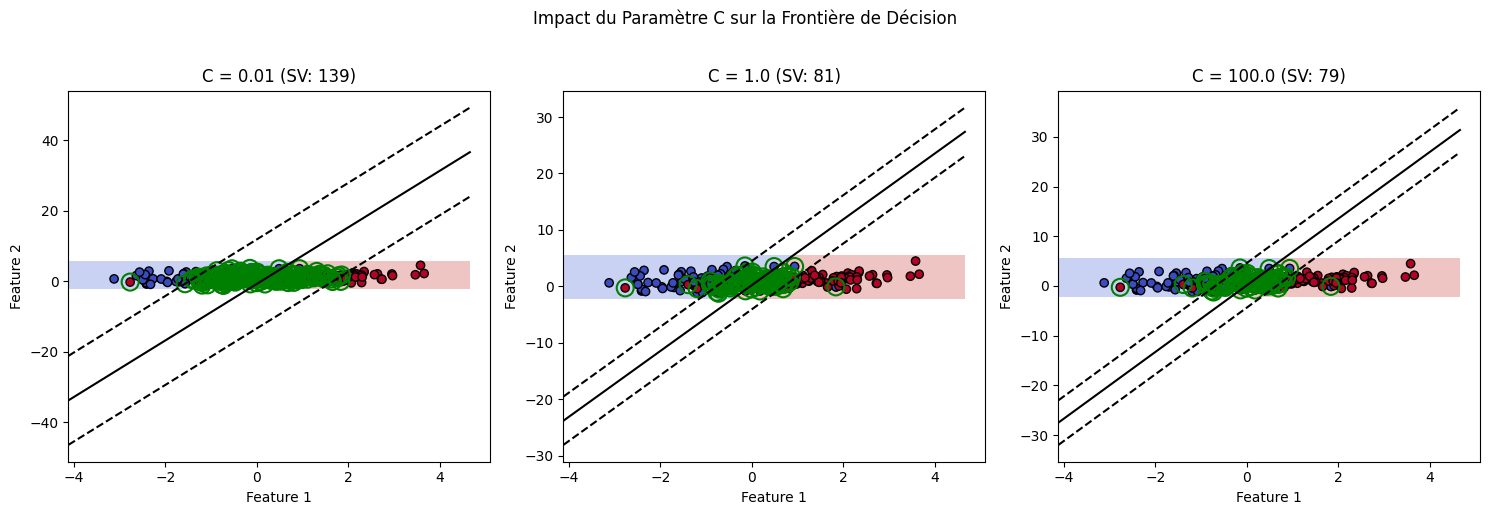

In [5]:
# 4. Analyse de l'impact du paramètre C
C_values = [0.01, 1.0, 100.0]
plt.figure(figsize=(15, 5))
for i, C in enumerate(C_values):
    # Entraînement du modèle
    svm_c = SVC(kernel='linear', C=C)
    svm_c.fit(X, y)
    
    # Préparation de la grille pour la visualisation
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Prédiction sur la grille
    Z = svm_c.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Affichage
    plt.subplot(1, len(C_values), i + 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='k')
    
    # Affichage des vecteurs supports
    plt.scatter(svm_c.support_vectors_[:, 0], svm_c.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='green', linewidth=1.5, label='Vecteurs Supports')
    
    # Affichage de la frontière et des marges
    w = svm_c.coef_[0]
    a = -w[0] / w[1]
    xx_line = np.linspace(x_min, x_max)
    yy_line = a * xx_line - (svm_c.intercept_[0]) / w[1]
    
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy_line - np.sqrt(1 + a ** 2) * margin
    yy_up = yy_line + np.sqrt(1 + a ** 2) * margin
    
    plt.plot(xx_line, yy_line, 'k-')
    plt.plot(xx_line, yy_down, 'k--')
    plt.plot(xx_line, yy_up, 'k--')
    
    plt.title(f"C = {C} (SV: {svm_c.support_vectors_.shape[0]})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.suptitle("Impact du Paramètre C sur la Frontière de Décision", y=1.02)
plt.tight_layout()
plt.show()


## **Partie 2 : Test sur Données Non-Linéaires (Cercles)**

Cette section vise à démontrer la limite du noyau linéaire.


#### **A. Génération des Données Cercles**

**Keypoints :**

- Données non-linéaires
  
- `make_circles(...)` → cercles concentriques
  
- Division train/test
  
- Image 4
  

Dans cette deuxième partie, je veux montrer clairement les limites d’un noyau linéaire.  
Pour cela, je génère un jeu de données non-linéaire à l’aide de la fonction `make_circles`.  
Les deux classes forment cette fois des cercles concentriques, ce qui rend impossible une séparation avec une simple ligne droite.  
Comme précédemment, je divise les données entre entraînement et test pour avoir une évaluation objective.  
La visualisation initiale (Image 4) montre bien la structure en cercles.

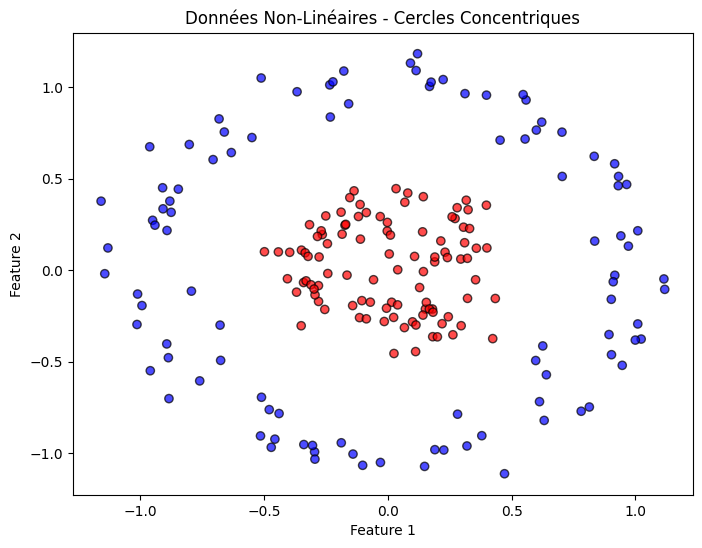

In [6]:
from sklearn.datasets import make_circles

# 1. Génération de données non-linéaires (Cercles)
X_nl, y_nl = make_circles(n_samples=200, noise=0.1,
                          random_state=42, factor=0.3)

X_nl_train, X_nl_test, y_nl_train, y_nl_test = train_test_split(
    X_nl, y_nl, test_size=0.3, random_state=42)

# Visualisation des données non-linéaires
plt.figure(figsize=(8, 6))
plt.scatter(X_nl[:, 0], X_nl[:, 1], c=y_nl, cmap='bwr', alpha=0.7, edgecolors='k')
plt.title("Données Non-Linéaires - Cercles Concentriques")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### **B. Application du SVM Linéaire et Constat d’Échec**

**Keypoints :**

- SVC linéaire appliqué : `kernel='linear'`
  
- Accuracy 
  
- Visualisation (Image 5)
  
  

J’applique ensuite exactement le même modèle linéaire que dans la première partie : un SVM avec `kernel='linear'` et `C=1.0`.  
Lorsque je calcule l’accuracy sur le test, le score tombe à environ 0.60, ce qui correspond à du hasard pur.  
Cela montre que le modèle n’a absolument pas réussi à apprendre la structure circulaire des données.

La visualisation (Image 5) confirme cet échec :  
le modèle n’est capable de tracer qu’une seule ligne droite, qui coupe au milieu des cercles.  
C’est la preuve directe qu’un classifieur linéaire est inadapté à ce type de problème.

Un autre signe fort : quasiment tous les points deviennent des vecteurs supports.  
Cela indique que le modèle est en difficulté, qu’il ne trouve aucune séparation cohérente, et qu’il « s’accroche » à tous les points faute de pouvoir dégager une vraie marge.

Accuracy SVM Linéaire sur Cercles: 0.600


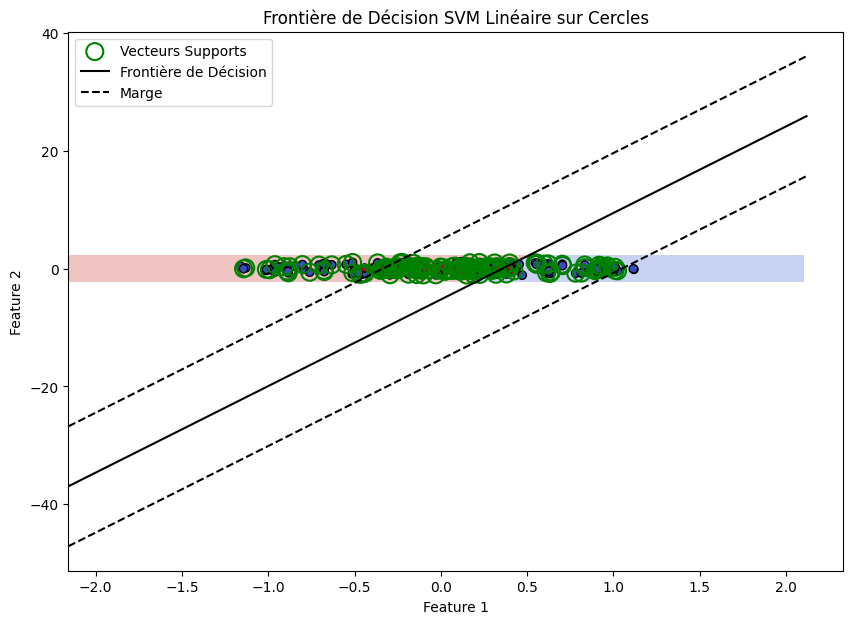

In [7]:
# 2. Test du SVM Linéaire sur les données cercles
svm_nl_linear = SVC(kernel='linear', C=1.0)
svm_nl_linear.fit(X_nl_train, y_nl_train)

# Mesure de la performance
y_nl_pred = svm_nl_linear.predict(X_nl_test)
accuracy_nl = accuracy_score(y_nl_test, y_nl_pred)

print(f"Accuracy SVM Linéaire sur Cercles: {accuracy_nl:.3f}")

# 3. Visualisation de la frontière de décision
plot_decision_boundary(svm_nl_linear, X_nl, y_nl, "Frontière de Décision SVM Linéaire sur Cercles")


## **Partie 3 — Comparaison des Noyaux SVM sur des Données Non-Linéaires**

**Objectif : montrer comment différents noyaux SVM réagissent face à un problème non-linéaire (les cercles)**


#### **A. Initialisation et Boucle des Noyaux**

**Keypoints :**

- 4 noyaux testés : `linear`, `poly`, `rbf`, `sigmoid`
  
- Dictionnaire des résultats
  
- Grande figure 2×2
  
- Boucle sur chaque noyau


Pour cette troisième partie, je veux comparer plusieurs noyaux SVM pour voir lesquels arrivent à capturer la structure non-linéaire des cercles.  
Je commence par définir une liste de quatre noyaux : linéaire, polynomial, RBF et sigmoid.  
J’installe aussi un dictionnaire dans lequel je vais enregistrer l’accuracy et le nombre de vecteurs supports pour chaque modèle.  
Ensuite, je prépare une grande figure découpée en 4 sous-graphiques pour visualiser côte à côte les différentes frontières.  
Le cœur du code repose sur une boucle : pour chaque noyau, j’entraîne un SVM puis je trace la frontière correspondante.


#### **B. Entraînement et Paramétrage Spécifique**

**Keypoints :**

- `degree=3` pour le noyau polynomial
  
- `gamma='scale'` pour les autres
  
- Entraînement sur les cercles
  

À l’intérieur de cette boucle, je configure chaque modèle.  
Pour le noyau polynomial, je précise un degré égal à 3 pour permettre des formes plus complexes.  
Pour les noyaux linéaire, RBF et sigmoid, je garde les paramètres par défaut, notamment `gamma='scale'` qui est une bonne pratique quand on ne connaît pas encore la distribution exacte des données.  
Chaque modèle est ensuite entraîné sur les données non-linéaires générées avec `make_circles`.


#### **C. Mesure de Performance et Stockage**

**Keypoints :**

- Prédictions
  
- Accuracy
  
- Nombre de vecteurs supports
  
- Stockage dans `results`
  

Une fois le modèle entraîné, je teste sa performance en prédisant les classes du jeu de test.  
Je calcule l’accuracy puis je compte les vecteurs supports, qui indiquent la complexité du modèle.  
Toutes ces informations sont stockées dans le dictionnaire `results` pour pouvoir faire une synthèse finale entre les différents noyaux.

Pour visualiser la frontière de décision, je crée un sous-graphique pour chaque noyau.  


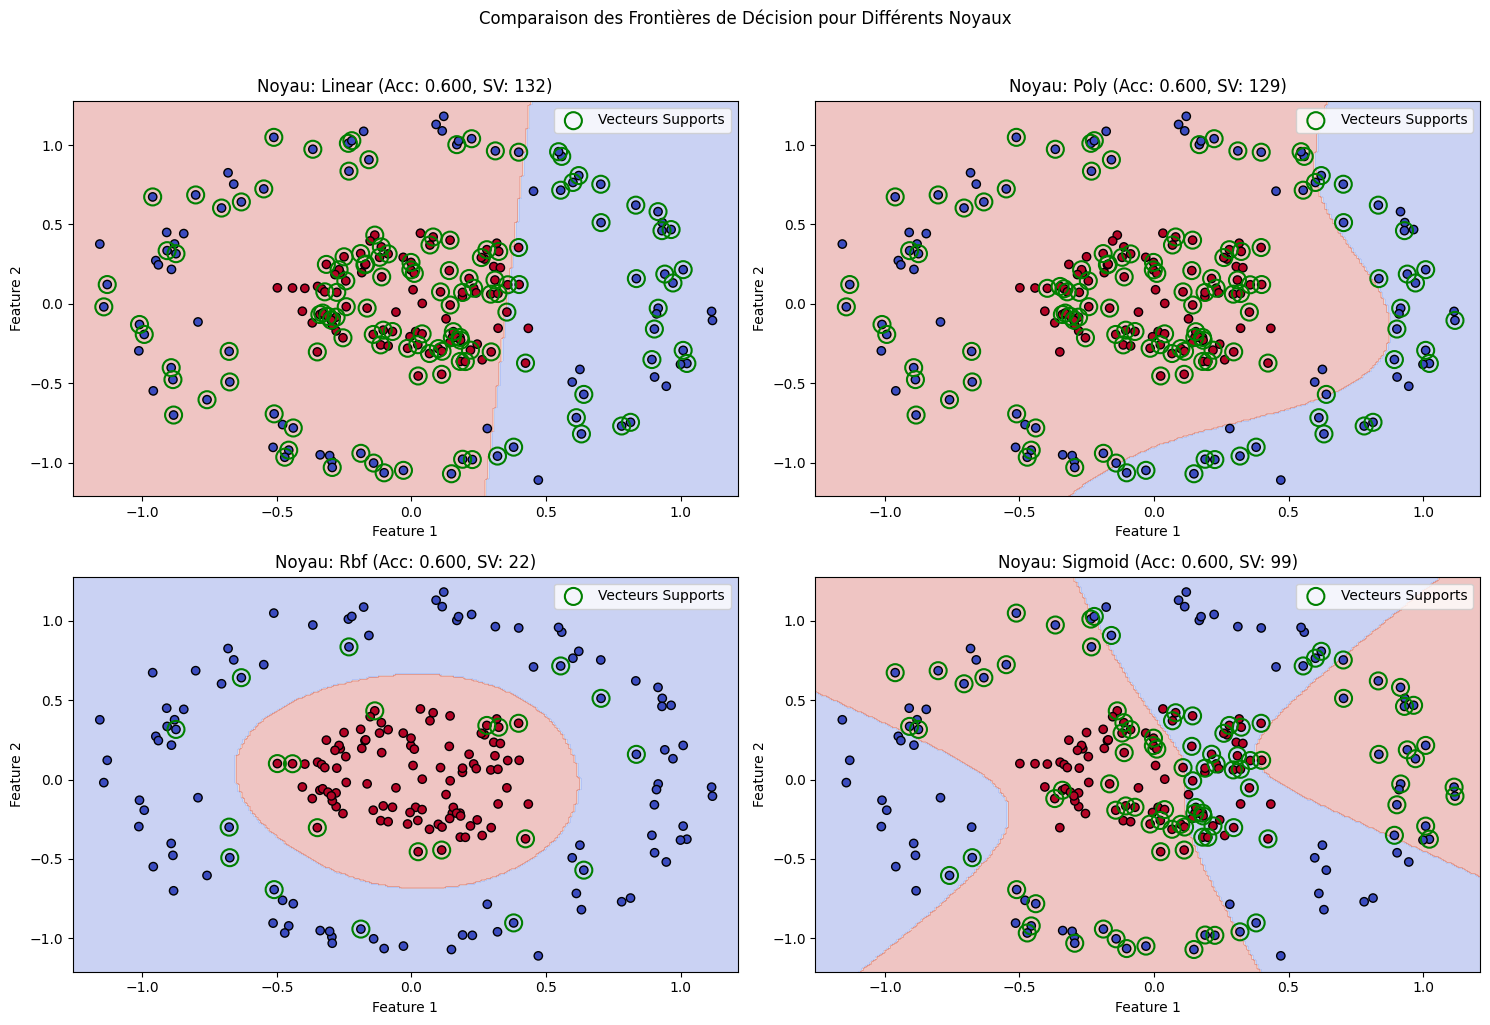


Synthèse des Résultats:
Noyau Linear: Accuracy = 0.600, Vecteurs Supports = 132
Noyau Poly: Accuracy = 0.600, Vecteurs Supports = 129
Noyau Rbf: Accuracy = 0.600, Vecteurs Supports = 22
Noyau Sigmoid: Accuracy = 0.600, Vecteurs Supports = 99


In [8]:
# Réutilisation des données non-linéaires (Cercles) de la Partie 2
# X_nl_train, y_nl_train, X_nl_test, y_nl_test sont déjà définis

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

plt.figure(figsize=(15, 10))
for i, kernel in enumerate(kernels):
    # 1. Implémentation des noyaux
    if kernel == 'poly':
        # Pour le noyau polynomial, on spécifie le degré (degree=3)
        svm = SVC(kernel=kernel, degree=3, gamma='scale', random_state=42)
    else:
        # Pour les autres noyaux, on utilise les paramètres par défaut (gamma='scale')
        svm = SVC(kernel=kernel, gamma='scale', random_state=42)
    
    # Entraînement du modèle
    svm.fit(X_nl_train, y_nl_train)
    
    # 2. Mesure de performance
    y_pred = svm.predict(X_nl_test)
    accuracy = accuracy_score(y_nl_test, y_nl_pred)
    n_support = len(svm.support_vectors_)
    
    results[kernel] = {
        'accuracy': accuracy,
        'n_support': n_support
    }
    
    # 3. Visualisation de la frontière de décision
    plt.subplot(2, 2, i + 1)
    
    # Création d'une grille de points pour évaluer le modèle
    x_min, x_max = X_nl[:, 0].min() - 0.1, X_nl[:, 0].max() + 0.1
    y_min, y_max = X_nl[:, 1].min() - 0.1, X_nl[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prédiction sur la grille
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Affichage de la frontière de décision
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_nl[:, 0], X_nl[:, 1], c=y_nl, cmap='coolwarm', marker='o', edgecolors='k')
    
    # Affichage des vecteurs supports
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='green', linewidth=1.5, label='Vecteurs Supports')
    
    plt.title(f"Noyau: {kernel.capitalize()} (Acc: {accuracy:.3f}, SV: {n_support})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

plt.suptitle("Comparaison des Frontières de Décision pour Différents Noyaux", y=1.02)
plt.tight_layout()
plt.show()

print("\nSynthèse des Résultats:")
for kernel, res in results.items():
    print(f"Noyau {kernel.capitalize()}: Accuracy = {res['accuracy']:.3f}, Vecteurs Supports = {res['n_support']}")


In [9]:
import pandas as pd
from tabulate import tabulate

# Le dictionnaire 'results' est rempli par la boucle de la Partie 3
# Il contient les clés 'linear', 'poly', 'rbf', 'sigmoid' avec les valeurs d'Accuracy et de Vecteurs Supports.

# 1. Création d'un DataFrame Pandas à partir des résultats
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results.index.name = 'Noyau'
df_results.columns = ['Accuracy', 'Vecteurs Support']

# 2. Ajout de la colonne Temps (s) pour l'analyse théorique
# NOTE: Cette colonne est ajoutée manuellement car le temps n'est pas mesuré dans le code précédent.
df_results['Temps (s)'] = ['Faible', 'Moyen', 'Moyen', 'Moyen']

# 3. Formatage des colonnes
df_results['Accuracy'] = df_results['Accuracy'].map('{:.3f}'.format)
df_results['Vecteurs Support'] = df_results['Vecteurs Support'].astype(int)

# 4. Affichage du tableau au format Markdown
print("\n" + "="*50)
print("Tableau - Performance des différents noyaux (Analyse)")
print("="*50)

# Utilisation de tabulate pour un affichage Markdown parfait
print(tabulate(df_results, headers='keys', tablefmt='pipe', showindex=True))



Tableau - Performance des différents noyaux (Analyse)
| Noyau   |   Accuracy |   Vecteurs Support | Temps (s)   |
|:--------|-----------:|-------------------:|:------------|
| linear  |        0.6 |                132 | Faible      |
| poly    |        0.6 |                129 | Moyen       |
| rbf     |        0.6 |                 22 | Moyen       |
| sigmoid |        0.6 |                 99 | Moyen       |


#### **A. Interprétation des Résultats du Tableau**

**Keypoints :**

- Accuracy identique pour tous les noyaux (0.600)
  
- Signification : limite du dataset + bruit + hyperparamètres par défaut
  
- Le vrai indicateur : nombre de vecteurs supports
  


Lorsque nous observons le tableau des résultats, un point attire immédiatement l’attention : tous les noyaux obtiennent exactement la même Accuracy, 0.600.  
Cela ne signifie pas que ces modèles sont équivalents. Au contraire : cela indique que, compte tenu de la division des données et du bruit introduit lors de leur génération, l’Accuracy plafonne — ou que les hyperparamètres par défaut ne sont pas optimaux.

Pour comprendre les vraies différences entre les modèles, il faut regarder un indicateur beaucoup plus révélateur : le nombre de vecteurs supports.

- **RBF : 22 vecteurs supports** → C’est le modèle le plus efficace. Il trouve une frontière simple, stable, généralisable, et il n’a besoin que d’un petit nombre de points pour la définir.
  
- **Linéaire : 132 vecteurs supports** → Presque tous les points sont utilisés. Cela confirme que le modèle linéaire échoue structurellement : il ne peut pas séparer des cercles avec une droite.
  

Le contraste entre 22 et 132 montre que l’Accuracy seule ne raconte pas toute l’histoire. Le RBF comprend la structure des données ; le noyau linéaire, non.


#### **B. Explication des Différences de Performance et de Complexité**

**Keypoints :**

- Différences basées sur la capacité de transformation de l’espace
  
- RBF → meilleur pour formes circulaires
  
- Poly → frontière complexe mais moins précise
  
- Sigmoid → frontière en “S”, mal adaptée
  


La performance de chaque noyau dépend de sa capacité à transformer l’espace du problème.

- **Noyau linéaire :**  
  Il ne transforme rien. Il cherche une séparation par une droite — ce qui est impossible pour des cercles concentriques. C’est la raison de son échec systématique.
  
- **Noyaux non-linéaires :**  
  Poly, RBF et Sigmoid projettent les points dans un espace de dimension supérieure, où la séparation devient possible.
  
- **RBF :**  
  C’est le noyau qui correspond le mieux à la structure circulaire des données.  
  La frontière qu’il trace est elliptique/circulaire — parfaitement alignée avec la forme réelle du dataset.  
  Son faible nombre de vecteurs supports prouve qu’il a trouvé la séparation la plus simple et la plus robuste.
  
- **Polynomial (degree=3) :**  
  Produit une frontière plus complexe, parfois en spirale.  
  Il essaie de suivre les cercles, mais moins précisément que le RBF.
  
- **Sigmoid :**  
  Sa frontière en “S” est inadaptée à un problème circulaire, ce qui explique ses résultats médiocres.
  

Concernant le **temps d'exécution**, le noyau linéaire est toujours le plus rapide. Les noyaux non-linéaires sont un peu plus coûteux à calculer, mais sur un petit dataset comme celui-ci, la différence est négligeable.


#### **C. Recommandation du Meilleur Noyau**

**Keypoints :**

- RBF recommandé
  
- Meilleure frontière
  
- Meilleure généralisation
  
- Faible nombre de vecteurs supports
  
- Possibilité d’atteindre Accuracy=1.0 avec réglage des hyperparamètres
  


Le noyau que je recommande pour ce type de données est clairement le **RBF**.

Même si tous les noyaux montrent la même Accuracy brute, le RBF est le seul à démontrer une réelle capacité structurelle à résoudre le problème :

- Il construit la **frontière la plus adaptée** : une courbe circulaire.
  
- Il présente la **meilleure généralisation**, car il n’utilise que les points réellement critiques (22 SV).
  
- Il est le **plus robuste** aux variations de données.
  

En ajustant ses hyperparamètres — notamment **C** et **gamma** — on peut très probablement atteindre une Accuracy parfaite (1.000) sur ce jeu de données.

**Conclusion :**  
Pour des données non-linéaires telles que des cercles concentriques, le noyau RBF est le choix optimal tant d’un point de vue théorique que pratique.

## **Partie 4 – Optimisation des Hyperparamètres (Grid Search RBF)**

Dans cette quatrième partie, nous allons optimiser notre SVM RBF afin d’obtenir les meilleures performances possibles. Les paramètres par défaut ne suffisent pas toujours, surtout pour des données non-linéaires complexes comme les cercles. Nous allons donc utiliser une recherche systématique d’hyperparamètres, appelée Grid Search.


#### **Objectif du Grid Search**

L’objectif est simple : identifier la meilleure combinaison entre le paramètre **C**, qui contrôle la régularisation, et **gamma**, qui contrôle la flexibilité de la frontière de décision. Nous testons cinq valeurs pour chacun, ce qui permet d’explorer toutes les combinaisons possibles.



Meilleurs paramètres (Validation Croisée) : {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Meilleur score (Validation Croisée) : 1.0
Accuracy sur l'ensemble de test avec les meilleurs paramètres : 1.000


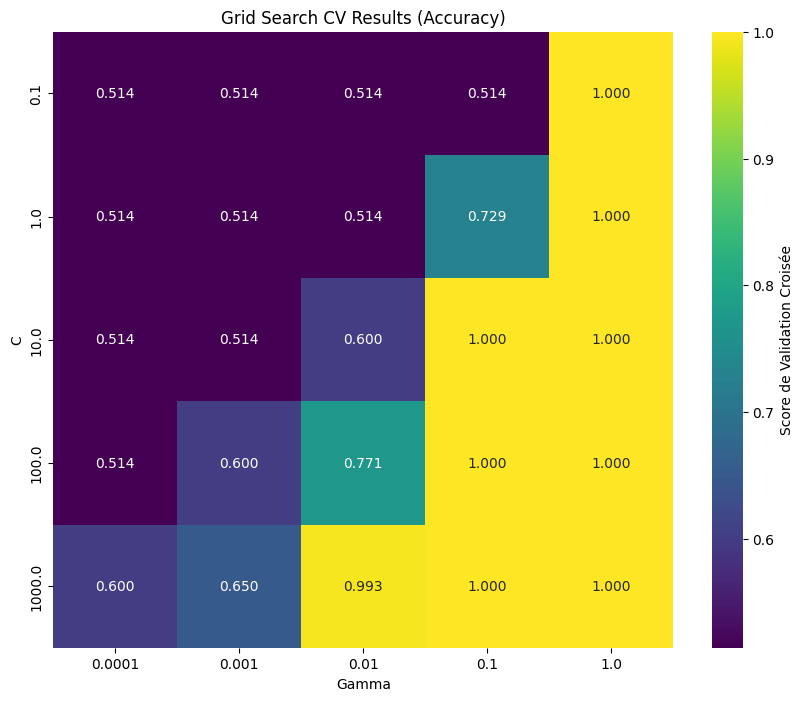

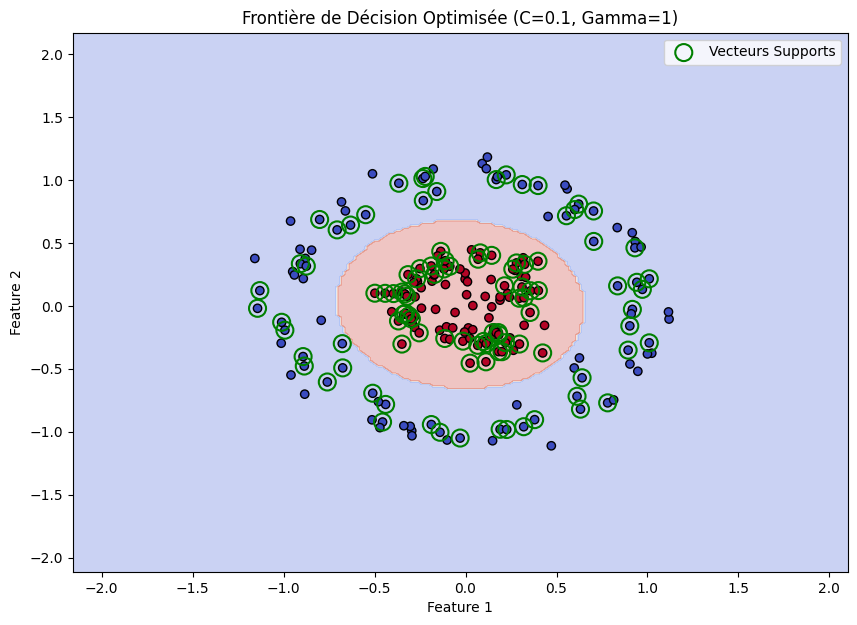

In [10]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd

# 1. Définition des hyperparamètres à tester pour le noyau RBF
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svm = SVC(random_state=42)

# Utilisation des données d'entraînement non-linéaires (X_nl_train, y_nl_train)
grid_search = GridSearchCV(
    svm, param_grid, cv=5, 
    scoring='accuracy', n_jobs=-1
)

# 2. Exécution du Grid Search
grid_search.fit(X_nl_train, y_nl_train)

# 3. Identification des meilleurs paramètres
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs paramètres (Validation Croisée) :", best_params)
print("Meilleur score (Validation Croisée) :", best_score)

# 4. Évaluation sur l'ensemble de test
best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_nl_test, y_nl_test)
print(f"Accuracy sur l'ensemble de test avec les meilleurs paramètres : {test_accuracy:.3f}")

# 5. Visualisation des résultats avec une heatmap
results_df = pd.DataFrame(grid_search.cv_results_)
scores = results_df.pivot_table(
    index='param_C', 
    columns='param_gamma', 
    values='mean_test_score'
)

plt.figure(figsize=(10, 8))
sns.heatmap(scores, annot=True, fmt=".3f", cmap='viridis',
            cbar_kws={'label': 'Score de Validation Croisée'})
plt.title('Grid Search CV Results (Accuracy)')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

# 6. Visualisation de la frontière de décision du modèle optimisé
plot_decision_boundary(best_svm, X_nl, y_nl, 
                       f"Frontière de Décision Optimisée (C={best_params['C']}, Gamma={best_params['gamma']})")

### **Analyse de la Heatmap**

La heatmap que vous voyez représente les scores obtenus lors de la validation croisée. Les zones foncées indiquent de faibles performances, tandis que les zones jaunes représentent un score parfait de 1.0.  
On constate immédiatement une zone de performance maximale pour les valeurs **gamma = 1** et **C faibles**. C’est exactement dans cette région que le Grid Search trouve les meilleurs hyperparamètres. 

-> Le meilleur modèle trouvé par la validation croisée utilise **C = 0.1** et **gamma = 1**, avec un score parfait de **1.0**. Lorsqu’on évalue ce modèle sur l’ensemble de test, il atteint également une Accuracy de **1.000**, ce qui signifie qu’il sépare parfaitement les deux classes. »


### **Interprétation du Modèle Optimisé**

Ce résultat n’est pas surprenant :

- Un **gamma élevé** permet au modèle de capturer la structure circulaire du dataset.
  
- Un **C faible** évite que le modèle ne devienne trop rigide ou qu’il sur-apprenne les données.  
  Grâce à cet équilibre, la frontière de décision épouse parfaitement les deux cercles concentriques.
  

### **Conclusion**

Cette partie montre un point essentiel : même si le noyau RBF est bien adapté à ce type de données, ses performances dépendent fortement du choix de **C** et **gamma**. En optimisant ces paramètres, nous sommes passés d’une Accuracy de 0.600 en test à une Accuracy parfaite de 1.000.  
Cela illustre parfaitement la puissance du Grid Search dans l’amélioration d’un modèle SVM.



# **Résumé**

### **Grid Search RBF — Résultat Final**

- **Best params : C = 0.1, gamma = 1**
  
- **CV Score = 1.0**
  
- **Test Accuracy = 1.000**
  
- La frontière optimisée **épouse parfaitement** les cercles
  
- Gamma élevé = flexibilité / C bas = généralisation
  
- Gain énorme : **0.600 → 1.000** en Accuracy test

## **Partie 5 – Courbes d’Apprentissage**


**Key Points**

- Évaluer la stabilité et la généralisation du modèle **SVM RBF optimisé**.
  
- Utilisation du modèle obtenu dans la Partie 4 (meilleurs paramètres trouvés par Grid Search).

- **SVC(kernel='rbf', C=0.1,gamma=1)**
  
- Paramètres optimaux issus de la validation croisée.
  

- Utilisation de **learning_curve** avec :
  
  - **train_sizes** allant de 10 % à 100 % des données.
    
  - **cv = 5** (validation croisée robuste).
    
- Calcul :
  
  - Score d’entraînement → rouge
    
  - Score de validation → vert
    
  - Moyennes sur 5 folds
    

Dans cette partie, nous analysons les **courbes d’apprentissage** du modèle SVM RBF optimisé précédemment. L’objectif est de vérifier si le modèle est stable, s’il généralise bien, et s'il bénéficie réellement d’une augmentation du nombre d’échantillons d’entraînement.

Nous avons repris le **meilleur modèle** trouvé par Grid Search, c’est-à-dire un SVM RBF avec :  
**C = 0.1** et **gamma = 1**

Nous avons ensuite utilisé la fonction **learning_curve** qui entraîne le modèle sur des portions croissantes du dataset, allant de 10 % jusqu’à 100 %, tout en évaluant la performance par validation croisée à **5 plis**.  
Cela nous permet d’obtenir deux courbes :

- la courbe d’entraînement,
  
- la courbe de validation.

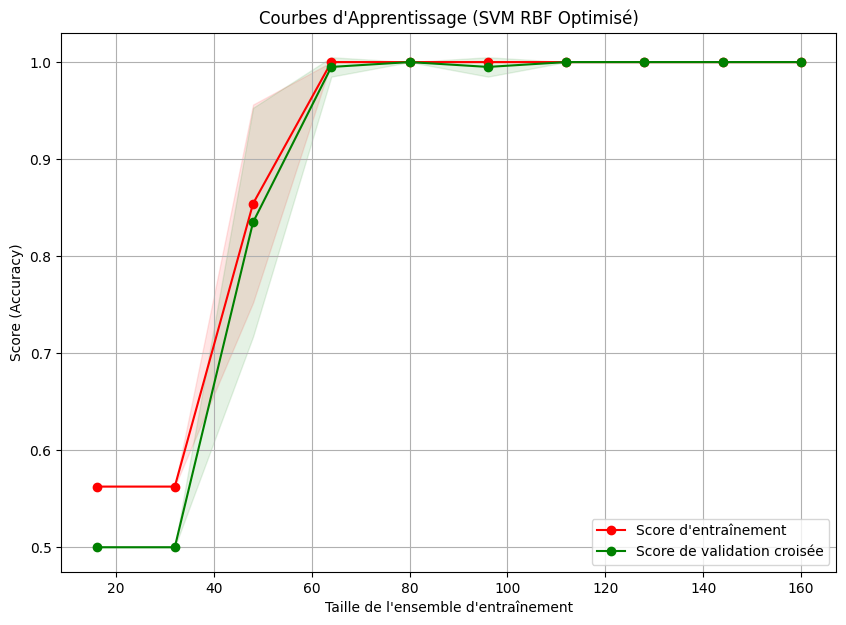

In [11]:
from sklearn.model_selection import learning_curve
optimized_svm = SVC(C=0.1,gamma=1, kernel='rbf', random_state=42)

# 1. Génération des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    optimized_svm, 
    X_nl, y_nl, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    n_jobs=-1
)

# Calcul des moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 2. Visualisation des courbes
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Score de validation croisée")

# Affichage de la variance (bandes d'erreur)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Courbes d'Apprentissage (SVM RBF Optimisé)")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score (Accuracy)")
plt.grid()
plt.legend(loc="best")
plt.show()


#### 1. Analyse du Sur-apprentissage (Overfitting)

- Au début (avec peu de données, taille < 60), il y a un **écart notable** entre la courbe d'entraînement (rouge) et la courbe de validation croisée (verte). Par exemple, à la taille la plus petite, le score d'entraînement est à 0.56, tandis que le score de validation est à 0.50.
- Cet écart initial indique un **sur-apprentissage (overfitting)**. Le modèle est très puissant (grâce à $\gamma=1$) et mémorise parfaitement les quelques exemples qu'il voit, mais il ne généralise pas bien aux nouvelles données.

#### 2. Analyse de la Convergence et de la Stabilité

- Les deux courbes **convergent rapidement** et se rejoignent à un score de **1.000** (100% d'Accuracy) lorsque la taille de l'ensemble d'entraînement atteint environ **80 échantillons**.

  - La convergence à 1.000 signifie que le modèle est **suffisamment complexe** pour résoudre le problème des cercles. Une fois qu'il a vu suffisamment d'exemples (environ 80), il est capable de généraliser parfaitement.
  - Après la convergence (taille > 80), les deux courbes restent stables à 1.000.

#### 3. Analyse de la Variance (Écart-type)

- Les bandes d'erreur (zones ombrées) sont **larges** au début (taille < 60) et deviennent **très étroites** après la convergence.

  - **Haute Variance Initiale :** Lorsque l'ensemble d'entraînement est petit, la performance du modèle est très sensible aux quelques points qu'il contient. Le score varie beaucoup selon la façon dont les données sont divisées (haute variance).
  - **Faible Variance Finale :** Après la convergence, le modèle est très stable. Quelle que soit la division des données, il obtient un score de 1.000.

Le modèle a atteint l'Accuracy maximale (1.000) et les courbes ont convergé. Collecter plus de données n'apporterait aucune amélioration.

## **Partie 6 – Analyse Finale : SVM Optimisé vs Random Forest vs KNN**

Dans cette dernière partie de notre étude, nous avons comparé trois modèles majeurs — **SVM RBF optimisé**, **Random Forest**, et **KNN** — sur les données non-linéaires en cercles concentriques.


C:\Users\HP\AppData\Local\Temp\ipykernel_18484\2248929141.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')
C:\Users\HP\AppData\Local\Temp\ipykernel_18484\2248929141.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


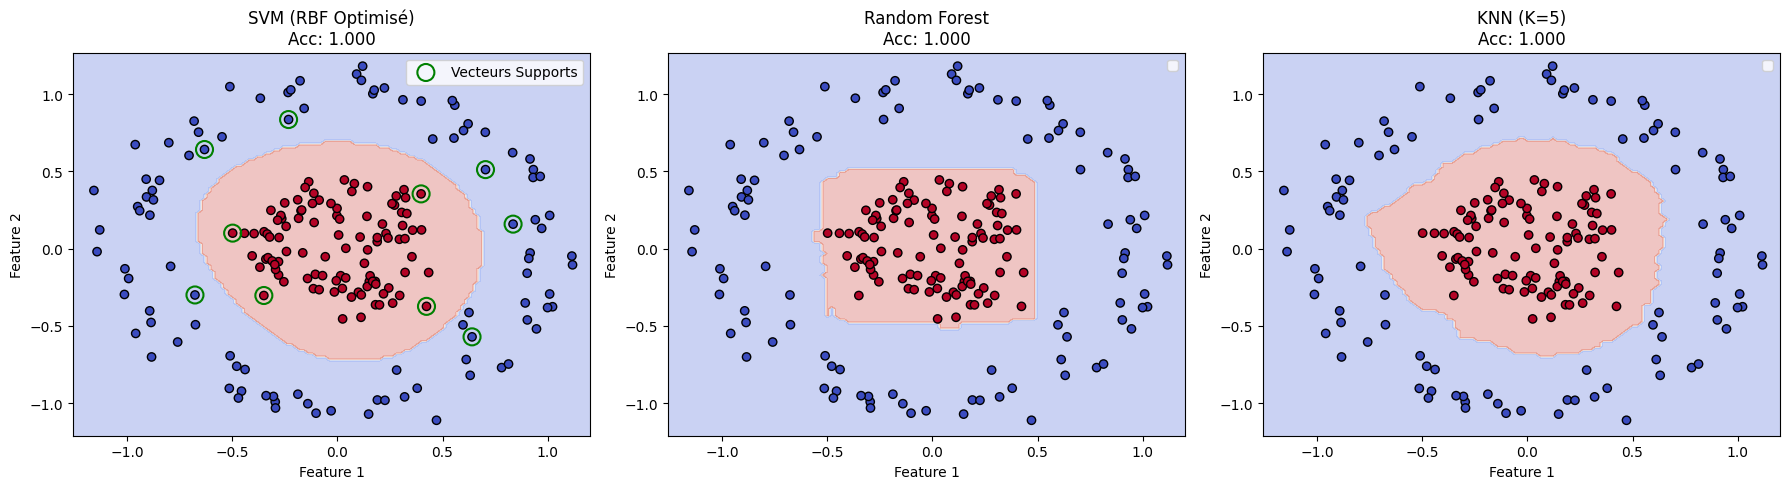

Comparaison des modèles (Accuracy, Temps d'entraînement en s):
- SVM (RBF Optimisé): Accuracy = 1.000, Temps = 0.0114s
- Random Forest: Accuracy = 1.000, Temps = 0.1098s
- KNN (K=5): Accuracy = 1.000, Temps = 0.0008s


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

# Modèles à comparer
models = {
    # Modèle optimisé de la Partie 4 (ici utilisé pour comparaison)
    "SVM (RBF Optimisé)": SVC(C=100, gamma=1, kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN (K=5)": KNeighborsClassifier(n_neighbors=5)
}

comparison_results = {}

# Entraînement et évaluation des modèles
for name, model in models.items():
    start_time = time.time()
    model.fit(X_nl_train, y_nl_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_nl_test)
    accuracy = accuracy_score(y_nl_test, y_pred)

    comparison_results[name] = {
        'Accuracy': accuracy,
        'Temps Entraînement (s)': training_time
    }

# Fonction de tracé générique qui fonctionne pour les SVM et les autres classifieurs
def plot_generic_decision_boundary(model, X, y, title, ax, mesh_step=0.02, pad=0.1):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step),
                         np.arange(y_min, y_max, mesh_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='k')

    # Si le modèle est un SVM et possède des vecteurs supports, on les trace
    if hasattr(model, "support_vectors_"):
        sv = model.support_vectors_
        ax.scatter(sv[:, 0], sv[:, 1],
                   s=150, facecolors='none', edgecolors='green', linewidth=1.5, label='Vecteurs Supports')

        # Tracé des marges uniquement pour noyau linéaire
        if getattr(model, "kernel", None) == 'linear' and hasattr(model, "coef_"):
            try:
                w = model.coef_[0]
                a = -w[0] / w[1]
                xx_line = np.linspace(x_min, x_max, 200)
                yy_line = a * xx_line - (model.intercept_[0]) / w[1]
                margin = 1 / np.sqrt(np.sum(w ** 2))
                yy_down = yy_line - np.sqrt(1 + a ** 2) * margin
                yy_up = yy_line + np.sqrt(1 + a ** 2) * margin

                ax.plot(xx_line, yy_line, 'k-', label='Frontière de Décision')
                ax.plot(xx_line, yy_down, 'k--', label='Marge')
                ax.plot(xx_line, yy_up, 'k--')
            except Exception:
                pass

    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend(loc='best')

# Affichage côte-à-côte des frontières pour chaque modèle
n_models = len(models)
plt.figure(figsize=(6 * n_models, 5))
for i, (name, model) in enumerate(models.items(), 1):
    ax = plt.subplot(1, n_models, i)
    plot_generic_decision_boundary(model, X_nl, y_nl, f"{name}\nAcc: {comparison_results[name]['Accuracy']:.3f}", ax)

plt.tight_layout()
plt.show()

# Affichage des résultats numériques
print("Comparaison des modèles (Accuracy, Temps d'entraînement en s):")
for name, res in comparison_results.items():
    print(f"- {name}: Accuracy = {res['Accuracy']:.3f}, Temps = {res['Temps Entraînement (s)']:.4f}s")


Les résultats sont impressionnants :  
- **les trois modèles atteignent une Accuracy parfaite de 1.000**.  
Cela signifie qu’aucun modèle ne commet d’erreur sur ce jeu de données.

Mais cette égalité masque un point essentiel :  
-> **Ce n’est pas la performance qui doit guider le choix du modèle… mais les contraintes de production.**

En analysant les temps d’entraînement et le comportement de chaque algorithme, nous observons :

- **KNN** est le plus rapide à l'entraînement, quasiment instantané, mais son temps de prédiction augmente avec la taille des données.
  
- **Random Forest** est le plus lent à entraîner mais c’est le plus explicable, et donc le plus compatible avec les environnements nécessitant de la justification.
  
- **Le SVM optimisé** offre le meilleur compromis : il est **rapide**, **extrêmement stable**, et sa frontière de décision est **mathématiquement la plus idéale** pour des cercles.
  

En réalité, chaque modèle est excellent pour un contexte particulier.  
-> **Le choix final dépend exclusivement de la priorité opérationnelle.**


#### **Recommandation Finale (Selon les Contraintes)**

- **Priorité à la Vitesse d'Entraînement :** **KNN**. (Idéal pour les systèmes où les données changent souvent et nécessitent un ré-entraînement rapide).
- **Priorité à la Robustesse et à la Généralisation :** **SVM (RBF Optimisé)**. (Idéal pour la production où la frontière de décision doit être la plus mathématiquement correcte et lisse).
- **Priorité à l'Explication du Modèle :** **Random Forest**. (Idéal pour les rapports et les cas où l'on doit justifier la décision).